In [2]:
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import (
    FIGDIR,
    AdjacencyMethod,
    DistanceTransformation,
    Normalizer,
    encode_variables_to_filename,
    get_dataset_filename,
    setup_plotting,
)

# setup_plotting()

GROUP_COLUMNS = [
    f"{metric_name}_{group_name}"
    for (metric_name, group_name) in itertools.product(
        ["avg_katz", "avg_closeness", "avg_betweenness", "avg_laplacian"],
        ["low", "medium", "high"],
    )
]

## Example configuration

In [3]:
event_filename = "all.txt"
input_data = use_threshold = False
transformation = DistanceTransformation.NONE
normalization = Normalizer.NONE
adjacency_method = AdjacencyMethod.MANHATTAN

dataset_conf = get_dataset_filename(
    event_filename,
    input_data,
    use_threshold,
)

best_conf = dataset_conf[
    (dataset_conf["transformation"] == transformation.value)
    & (dataset_conf["normalization"] == normalization.value)
    & (dataset_conf["adjacency_method"] == adjacency_method.value)
].reset_index(drop=True)

In [4]:
plot_df = (
    best_conf[GROUP_COLUMNS]
    .melt(
        var_name="metric_group",
        value_name="value",
    )
    .assign(
        metric=lambda df: df["metric_group"].apply(
            lambda x: "_".join(x.split("_")[:-1])
        ),
        group=lambda df: df["metric_group"].apply(lambda x: x.split("_")[-1]),
    )
)

In [5]:
plot_df

,metric_group,value,metric,group
0,avg_katz_low,0.105603,avg_katz,low
1,avg_katz_low,0.110201,avg_katz,low
2,avg_katz_low,0.115112,avg_katz,low
3,avg_katz_low,0.157509,avg_katz,low
4,avg_katz_low,0.156393,avg_katz,low
...,...,...,...,...
403,avg_laplacian_high,0.000243,avg_laplacian,high
404,avg_laplacian_high,0.015707,avg_laplacian,high
405,avg_laplacian_high,0.041759,avg_laplacian,high
406,avg_laplacian_high,0.000116,avg_laplacian,high


In [ ]:
fig_filename = (
    (
        encode_variables_to_filename(event_filename, input_data, use_threshold)
        .removesuffix(".csv")
        .removeprefix("dataset_")
    )
    + f"_transformation-{transformation.value}"
    f"_normalization-{normalization.value}"
    f"_adjacency-{adjacency_method.value}"
)

format = "png"

sns.boxplot(data=plot_df, x="metric", y="value", hue="group", palette="viridis")
plt.xticks(rotation=15)
# plt.savefig(FIGDIR / f"boxplot_{fig_filename}.{format}", format=format)
plt.show()

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

Error in callback <function _draw_all_if_interactive at 0x7fb3b8e22f20> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./file.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on file.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./file.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on file.log.




<Figure size 1980x1500 with 1 Axes>

## See for all datasets

In [3]:
dataset = pd.DataFrame()

combinations = itertools.product(
    ["all.txt", "all.original.txt", "all.imp.txt"], [True, False]
)

for event_filename, imput_data in combinations:
    use_threshold = imput_data
    dataset_conf = get_dataset_filename(
        event_filename,
        imput_data,
        use_threshold,
    )

    dataset = pd.concat([dataset, dataset_conf], ignore_index=True)

In [16]:
plot_df_all = (
    dataset[GROUP_COLUMNS]
    .melt(
        var_name="metric_group",
        value_name="value",
    )
    .assign(
        metric=lambda df: df["metric_group"].apply(
            lambda x: "_".join(x.split("_")[:-1])
        ),
        group=lambda df: df["metric_group"].apply(lambda x: x.split("_")[-1]),
    )
)

plot_df_all = plot_df_all.replace(
    ["avg_katz", "avg_closeness", "avg_betweenness", "avg_laplacian"],
    value=["Average\n Katz", "Average\n Closeness", "Average\n Betweenness", "Average\n Laplacian"],
).rename(columns={"group": "Cutoff Rigidity"})
plot_df_all

,metric_group,value,metric,Cutoff Rigidity
0,avg_katz_low,0.107758,Average\n Katz,low
1,avg_katz_low,0.106900,Average\n Katz,low
2,avg_katz_low,0.105791,Average\n Katz,low
3,avg_katz_low,0.105157,Average\n Katz,low
4,avg_katz_low,0.105173,Average\n Katz,low
...,...,...,...,...
73435,avg_laplacian_high,0.027545,Average\n Laplacian,high
73436,avg_laplacian_high,0.025582,Average\n Laplacian,high
73437,avg_laplacian_high,0.025756,Average\n Laplacian,high
73438,avg_laplacian_high,0.025582,Average\n Laplacian,high


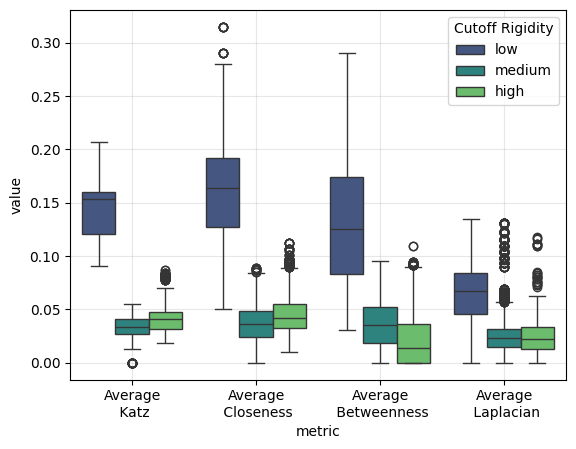

In [18]:
format = "png"

sns.boxplot(data=plot_df_all, x="metric", y="value", hue="Cutoff Rigidity", palette="viridis")
plt.grid(alpha=.3)
plt.savefig(FIGDIR / f"boxplot_plots_per_cutoff_group.{format}", format=format)
plt.show()